**What are the most demanded skills for the top 3 most popular data roles?**


***Methodology***


* Clean-up skill column
* Calculate skill count based on job_title_short
* Calculate skill percentage
* Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**Filtering Data for France**

In [3]:
df_FR = df[df['job_country'] == 'France']

**Explode Skills**


Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles. 

It is defined under a new dataframe df_skills

In [4]:
df_skills = df_FR.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
12,Stagiaire Data Analyst (H/F) - Lyon (69006),sql
12,Stagiaire Data Analyst (H/F) - Lyon (69006),php
12,Stagiaire Data Analyst (H/F) - Lyon (69006),excel
12,Stagiaire Data Analyst (H/F) - Lyon (69006),power bi
12,Stagiaire Data Analyst (H/F) - Lyon (69006),sap
...,...,...
785693,Senior Data Scientist BI,pandas
785693,Senior Data Scientist BI,numpy
785693,Senior Data Scientist BI,keras
785693,Senior Data Scientist BI,pytorch


**Count Skills per Job Title**


Grouping the DataFrame by job_skills and job_title_short, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, df_skills_count, shows the frequency of each skill with each job title.

In [5]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')   # changes it to a DataFrame

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
944,python,Data Scientist,6320
1211,sql,Data Analyst,6213
943,python,Data Engineer,6188
1212,sql,Data Engineer,5319
942,python,Data Analyst,4506
...,...,...,...
31,angular.js,Software Engineer,1
1457,wsl,Data Engineer,1
27,angular,Senior Data Analyst,1
20,alteryx,Software Engineer,1


**Create List of Top 3 Roles**


Focus: Data Analysts, Data Engineers, and Data Scientists. 
Filtering the job titles based on the most popular.

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

**Plot Skill Counts**


Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

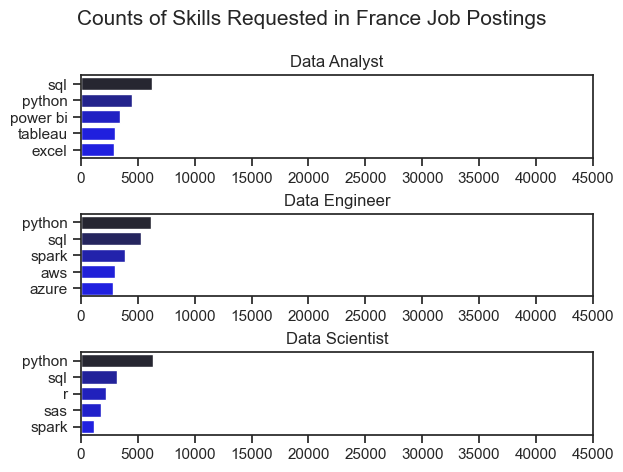

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:blue_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in France Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

**Converting Counts to Percentages**


Since Counts don't show what portions of jobs are requesting these skills.
So converting the counts into percentages which helps understand how each job title represents relative to the entire dataset.

Before the percentages can be calculated, the total counts for the jobs posted by job title is needed. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [9]:
# Use original df to get the count of job titles
df_job_title_count = df_FR['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,13803
1,Data Engineer,10936
2,Data Scientist,9497
3,Software Engineer,1203
4,Senior Data Engineer,1186
5,Senior Data Scientist,1029
6,Senior Data Analyst,804
7,Business Analyst,738
8,Machine Learning Engineer,388
9,Cloud Engineer,338


Then the percentages are calculated by: First merging df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [11]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_percent['skill_percent'] = (df_skills_percent['skill_count'] / df_skills_percent['jobs_total']) * 100

df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,6320,9497,66.547331
1,sql,Data Analyst,6213,13803,45.011954
2,python,Data Engineer,6188,10936,56.583760
3,sql,Data Engineer,5319,10936,48.637527
4,python,Data Analyst,4506,13803,32.645077
...,...,...,...,...,...
1469,angular.js,Software Engineer,1,1203,0.083126
1470,wsl,Data Engineer,1,10936,0.009144
1471,angular,Senior Data Analyst,1,804,0.124378
1472,alteryx,Software Engineer,1,1203,0.083126


**Plot Percentage Count**

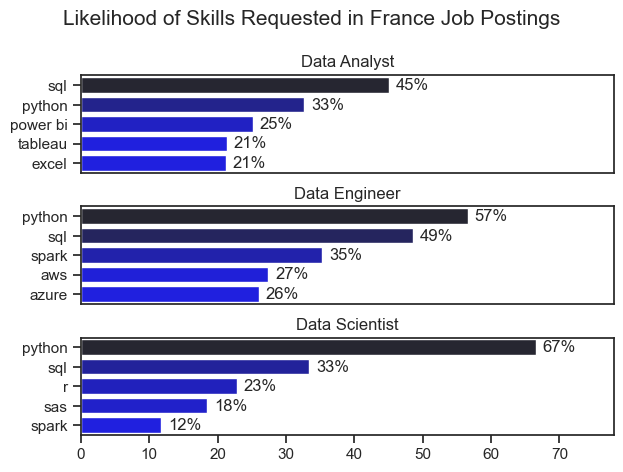

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:blue_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability and only keep the last one
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in France Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()